In [1]:
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Lasso,HuberRegressor,QuantileRegressor
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.model_selection import train_test_split


In [28]:
df = pd.read_excel('imoveis_novos.xlsx')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.fillna(0, inplace=True)
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1409 non-null   object 
 1   preço        1409 non-null   float64
 2   condominio   1409 non-null   float64
 3   status       1409 non-null   object 
 4   min area     1409 non-null   float64
 5   max area     1409 non-null   float64
 6   min quartos  1409 non-null   object 
 7   max quartos  1409 non-null   float64
 8   min vagas    1409 non-null   float64
 9   max vagas    1409 non-null   float64
 10  endereço     1409 non-null   object 
 11  bairro       1409 non-null   object 
 12  cidade       1409 non-null   object 
 13  estado       1409 non-null   object 
 14  endereço.1   1409 non-null   object 
 15  link         1409 non-null   object 
 16  min qurtos   1409 non-null   float64
dtypes: float64(8), object(9)
memory usage: 187.3+ KB


In [55]:
df2 = df[df['preço'] < 10**6*2]
df2 = df2[df2['preço'] > 200000]
#df2 = df2[df2['p m2'] > 3500]
#df2 = df2[df2['area'] <= 200]
#df2 = df2[df2['area'] >= 15]
#df2 = df2[df2['vagas'] <= 4]
#df2 = df2[df2['quartos'] <= 4]
#df2 = df2[df2['status'] == 'usado']
df2

,ID,preço,condominio,status,min area,max area,min quartos,max quartos,min vagas,max vagas,endereço,bairro,cidade,estado,endereço.1,link,min qurtos
36,2525452382,240000.0,0.0,Em construção,0.0,0.0,0,0.0,0.0,0.0,"Rua Abaíbas, 105",Vila Palmeiras,São Paulo,SP,"Rua Abaíbas, 105 - Vila Palmeiras, São Paulo - SP",/imoveis-lancamento/residencial-guaratuba-2525...,0.0
43,2532437319,599000.0,0.0,Em construção,0.0,0.0,0,0.0,0.0,0.0,"Rua Panhames, 45",Penha,São Paulo,SP,"Rua Panhames, 45 - Penha, São Paulo - SP",/imoveis-lancamento/cobertura-starting-2532437...,0.0
50,2525814047,209000.0,0.0,Na planta,0.0,0.0,0,0.0,0.0,0.0,"Rua Aurora, 904",República,São Paulo,SP,"Rua Aurora, 904 - República, São Paulo - SP",/imoveis-lancamento/terraco-republica-2525814047/,0.0
60,2520000980,1720100.0,0.0,Em construção,0.0,0.0,0,0.0,0.0,0.0,"Rua Catão, 876",Vila Romana,São Paulo,SP,"Rua Catão, 876 - Vila Romana, São Paulo - SP",/imoveis-lancamento/panorama-vila-romana-25200...,0.0
61,2525448588,220000.0,0.0,Pronto para morar,0.0,0.0,0,0.0,0.0,0.0,"Rua Dom Bernardo Nogueira, 563",Vila Gumercindo,São Paulo,SP,"Rua Dom Bernardo Nogueira, 563 - Vila Gumercin...",/imoveis-lancamento/residencial-malaga-2525448...,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,2537420812,1806184.0,0.0,Em construção,145.0,157.0,4,0.0,0.0,0.0,"Rua Cristina, 57",Anchieta,Belo Horizonte,MG,"Rua Cristina, 57 - Anchieta, Belo Horizonte - MG",/imoveis-lancamento/quadra-anchieta-2537420812/,0.0
1376,zonte-7981,735000.0,0.0,Pronto para morar,69.0,0.0,2,0.0,0.0,0.0,"Rua Genoveva de Souza, 879",Sagrada Família,Belo Horizonte,MG,"Rua Genoveva de Souza, 879 - Sagrada Família, ...",/imoveis-lancamento/reserva-horizonte-7981/,0.0
1385,2529929204,245000.0,0.0,Na planta,40.0,61.0,1,2.0,0.0,2.0,"Rua Parambu, 586",Santa Teresa,Salvador,BA,"Rua Parambu, 586 - Santa Teresa, Salvador - BA",/imoveis-lancamento/residencial-versailles-252...,0.0
1394,2535610227,820200.0,0.0,Pronto para morar,114.0,321.0,3,4.0,0.0,4.0,"Rua Albertino Cabral Henrique, 212",Pituaçu,Salvador,BA,"Rua Albertino Cabral Henrique, 212 - Pituaçu, ...",/imoveis-lancamento/parque-tropical-2535610227/,0.0


In [56]:
df3 = df2.groupby(['endereço','max vagas','min vagas','max area','min area','max quartos','cidade','min quartos','status'],as_index =False)['preço'].mean()
df3

,endereço,max vagas,min vagas,max area,min area,max quartos,cidade,min quartos,status,preço
0,"Alameda Franca, 1608",0.0,0.0,0.0,0.0,0.0,São Paulo,0,Na planta,1774100.0
1,"Alameda Franca, 444",0.0,0.0,0.0,0.0,0.0,São Paulo,0,Na planta,406410.0
2,"Alameda Iraé, 302",0.0,0.0,0.0,0.0,0.0,São Paulo,0,Em construção,456923.0
3,"Alameda Jauaperi, 299",0.0,0.0,0.0,0.0,0.0,São Paulo,0,Na planta,421695.0
4,"Alameda Lorena, 718",0.0,0.0,0.0,0.0,0.0,São Paulo,0,Em construção,463000.0
...,...,...,...,...,...,...,...,...,...,...
581,"Rua dos Timbiras, 3198",3.0,0.0,145.0,66.0,3.0,Belo Horizonte,2,Em construção,788000.0
582,"Rua Álvaro Rodrigues, 295",0.0,0.0,0.0,0.0,0.0,São Paulo,0,Pronto para morar,405000.0
583,"Rua Álvaro de Carvalho, 163",0.0,0.0,0.0,0.0,0.0,São Paulo,0,Pronto para morar,432000.0
584,"Rua Áurea, 69",0.0,0.0,0.0,0.0,0.0,São Paulo,0,Em construção,1820000.0


In [57]:
df4 = pd.get_dummies(df3,columns=['cidade'])
df4

,endereço,max vagas,min vagas,max area,min area,max quartos,min quartos,status,preço,cidade_ Belo Horizonte,cidade_ Campinas,cidade_ Osasco,cidade_ Salvador,cidade_ São Bernardo do Campo,cidade_ São Paulo
0,"Alameda Franca, 1608",0.0,0.0,0.0,0.0,0.0,0,Na planta,1774100.0,0,0,0,0,0,1
1,"Alameda Franca, 444",0.0,0.0,0.0,0.0,0.0,0,Na planta,406410.0,0,0,0,0,0,1
2,"Alameda Iraé, 302",0.0,0.0,0.0,0.0,0.0,0,Em construção,456923.0,0,0,0,0,0,1
3,"Alameda Jauaperi, 299",0.0,0.0,0.0,0.0,0.0,0,Na planta,421695.0,0,0,0,0,0,1
4,"Alameda Lorena, 718",0.0,0.0,0.0,0.0,0.0,0,Em construção,463000.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,"Rua dos Timbiras, 3198",3.0,0.0,145.0,66.0,3.0,2,Em construção,788000.0,1,0,0,0,0,0
582,"Rua Álvaro Rodrigues, 295",0.0,0.0,0.0,0.0,0.0,0,Pronto para morar,405000.0,0,0,0,0,0,1
583,"Rua Álvaro de Carvalho, 163",0.0,0.0,0.0,0.0,0.0,0,Pronto para morar,432000.0,0,0,0,0,0,1
584,"Rua Áurea, 69",0.0,0.0,0.0,0.0,0.0,0,Em construção,1820000.0,0,0,0,0,0,1


<AxesSubplot:xlabel='cidade', ylabel='preço'>

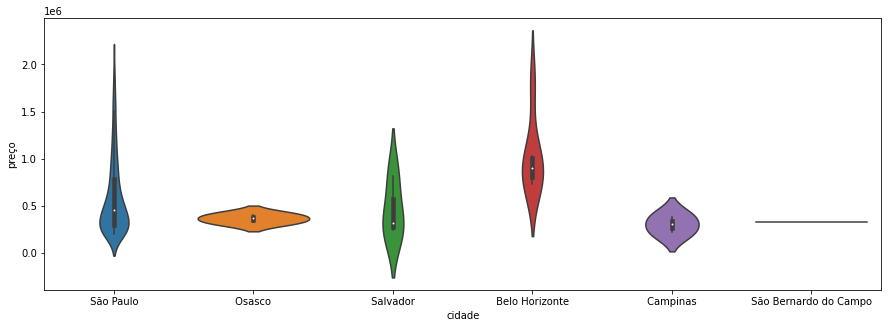

In [58]:
plt.figure(figsize=(15,5))
sns.violinplot(y=df3['preço'],x=df3['cidade'])

<AxesSubplot:xlabel='max quartos', ylabel='preço'>

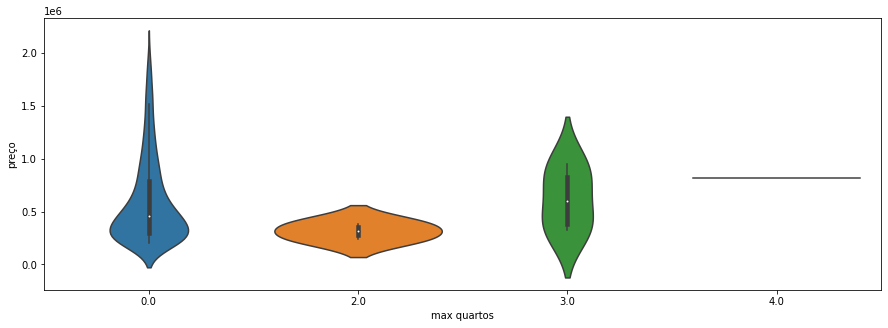

In [59]:
plt.figure(figsize=(15,5))
sns.violinplot(y=df3['preço'],x=df3['max quartos'])

In [60]:
#plt.figure(figsize=(20,5))
#sns.boxplot(y=df3['preço'],x=df3['bairro'])

In [61]:
#plt.figure(figsize=(15,5))
#sns.displot(df3,x='p m2',col='quartos',row='bairro')

<AxesSubplot:xlabel='max area', ylabel='preço'>

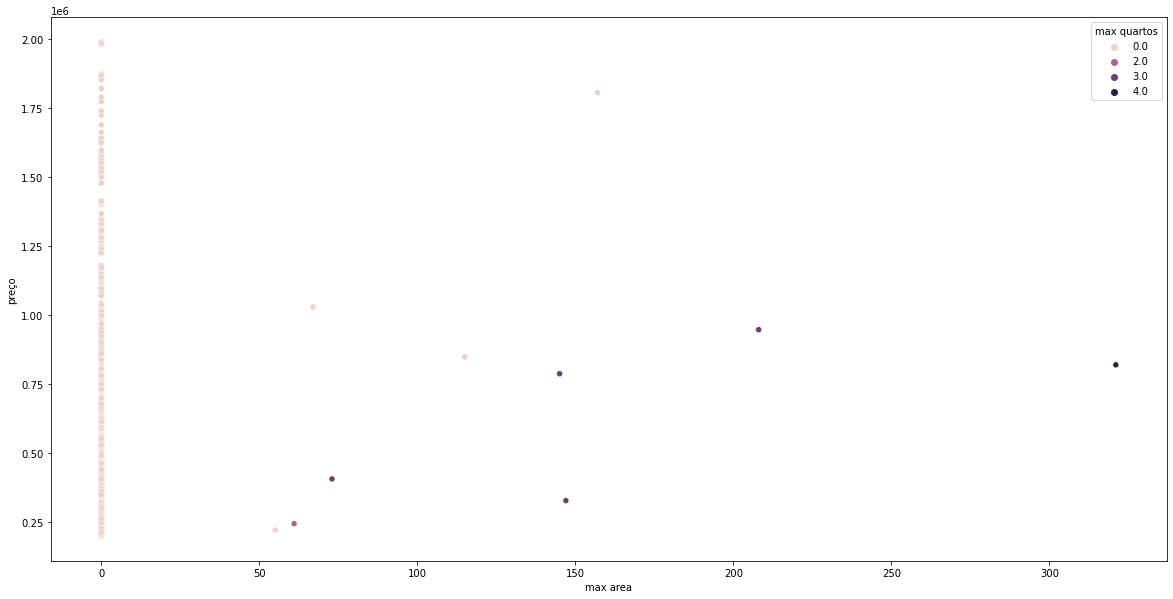

In [64]:
plt.figure(figsize=(20,10))

sns.scatterplot(data=df3,x='max area',y='preço',hue='max quartos')

In [63]:
x = df4.drop(['endereço','preço','p m2'],axis=1)
y = df4['preço']

KeyError: "['p m2'] not found in axis"

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42)


In [35]:
model_linear = LinearRegression()
model_linear.fit(x_train,y_train)
predict_linear = model_linear.predict(x_test)

Score: 0.7818733318069416


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='preço'>

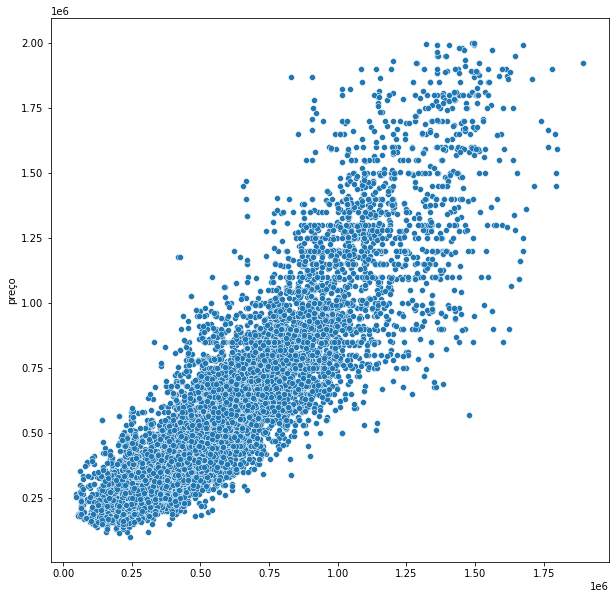

In [36]:
print(f'Score: {model_linear.score(x_test,y_test)}')
plt.figure(figsize=(10,10))
sns.scatterplot(predict_linear,y_test)

In [37]:
pd.DataFrame({'Valores':x.columns,'Coef':model_linear.coef_.round(2)})

,Valores,Coef
0,vagas,114128.73
1,area,6660.78
2,quartos,-7498.67
3,bairro_Barra Funda,73511.63
4,bairro_Belenzinho,-139.78
5,bairro_Brás,-46219.06
6,bairro_Butantã,-82881.14
7,bairro_Jaguaré,-123725.89
8,bairro_Liberdade,8910.23
9,bairro_Republica,44078.67


Score: 0.7818716189527575


C:\Users\a92550\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.818e+12, tolerance: 3.237e+10
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='preço'>

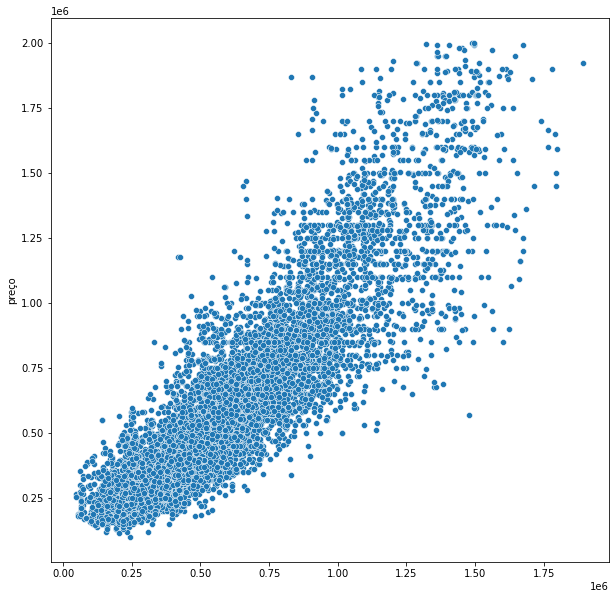

In [38]:
model_Lasso = Lasso()
model_Lasso.fit(x_train,y_train)
predict_Lasso = model_Lasso.predict(x_test)

print(f'Score: {model_Lasso.score(x_test,y_test)}')
plt.figure(figsize=(10,10))
sns.scatterplot(predict_Lasso,y_test)

In [39]:
qr_model = QuantileRegressor(alpha=0)

In [40]:
qr_model.fit(x_train,y_train)

KeyboardInterrupt: 